In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import random as rnd
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.plotting import ColumnDataSource,output_notebook
from bokeh.models import HoverTool
import math
from scipy.spatial.distance import euclidean

In [25]:
n_of_customers=int(input('The number of customers : '))
n_of_couriers=int(input('The number of couriers : '))
n_of_warehouses=int(input('The number of warehouses : '))
average_order_waiting_limit=int(input('Average Order waiting limit (in min) : '))*60

order_prob=0.000005
order_queue=pd.DataFrame({"Customers_in_queue":[]})

def queue_order_adding(data):
        order_queue=order_queue.append(pd.DataFrame({"Customers_in_queue":data}),ignore_index = True)

def calculateDistance(x1,y1,x2,y2):               #Calculates the hypotenuse distance of two points
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist
def Control_orders(objects,time):  #takes the exact time and calculate whether that customer give order at that time.
    customer_ids_gave_order=[]
    for i in range(n_of_customers):
        if objects[i].order_time_hist != []:
            if objects[i].order_time_hist[-1] == time :
                customer_ids_gave_order.append(objects[i].cust_id)
            
    return customer_ids_gave_order

def Courier_to_deliver(objects):
    pass

def available_couriers(cour_objects):
    available_ones=[]
    for cour in range(n_of_couriers):
        if(cour_objects[cour].availability == 1):
            available_ones.append(cour_objects[cour].cour_id)
    return available_ones

def nearest_warehouse(my_x,my_y):
    pt=[]
    best_dist=9999999
    for num in range(n_of_warehouses):
        hypotenuse_distance=calculateDistance(warehouse_objects[num].location_x,warehouse_objects[num].location_y,my_x,my_y)
        if hypotenuse_distance< best_dist:
            best_dist= hypotenuse_distance
            pt=num
    return num


def order_served_time(order_placement,order_received):
    return (order_received-order_placement)
    
        


class Warehouses:
    def __init__(self,wh_id):
        self.wh_id=wh_id
        self.location_x=rnd.randint(-8000, 8000)
        self.location_y=rnd.randint(-8000, 8000)
    
class Customers:
    def __init__(self,cust_id):
        self.cust_id=cust_id
        self.location_x=rnd.randint(-10000, 10000)
        self.location_y=rnd.randint(-10000, 10000)
        self.order_situation=0
        self.order_waiting_time=np.random.normal(average_order_waiting_limit, 100, 1)[0]
        self.order_time_hist=[]
        self.order_arrival_time=[]
        self.Rating=[]
        
        
    def give_order(self,time):
        if (rnd.random()<=order_prob) & (self.order_situation == 0) : #One can not give the second order 
            self.order_situation = 1                                  # before the last order is satisfied.
            self.order_time_hist.append(time)
            print('Customer {} gave order'.format(self.cust_id))
            
    def give_rating(Self,order_time,arrival_time):
        if(arrival_time-order_time<=self.order_waiting_time):
            rating=10-(10*((arrival_time-order_time)/self.order_waiting_time))+2
            self.Rating.append(rating)
        else:
            self.Rating.append(0)
        pass
    
class Couriers:
    def __init__(self,cour_id):
        self.cour_id=cour_id
        if(rnd.random()<0.2):
            self.vehicle_type ='car'
            self.capacity = 15
        else:
            self.vehicle_type = 'motorbike'
            self.capacity = 3
            
        self.speed = np.random.normal(0.5, 0.05, 1)[0]
        self.order_time_history=[]            #recording the order taken seconds.
        self.arrival_time=None                #the time between order accepting and warehouse arrival
        self.order_distribution_time=None     #the time between package taken and customer distribution
        self.order_taken_time=None            #the time a courier accepts the order.
        self.choosed_customer=None            #the customer for ordering
        self.choosed_warehouse=None           #the warehouse that supplies the ordered product for a courier.
        self.connected_warehouse=None         
        self.location_x =0.0
        self.location_y =0.0
        self.order_serving_time=[]
        self.availability=1                   #if courier is assigned an order availability is 0, else 1.
    
    def find_distance_time(self,your_x,your_y):
        return int(calculateDistance(self.location_x,self.location_y,your_x,your_y) / (14*2*self.speed))


    

    
customer_objects=[]
courier_objects=[]
warehouse_objects=[]


for ids in range(n_of_customers):
    customer_objects.append(Customers(ids))
for ids in range(n_of_warehouses):
    warehouse_objects.append(Warehouses(ids))
for ids in range(n_of_couriers):
    courier_objects.append(Couriers(ids))
for l in range(n_of_couriers):   #Distributes all couriers to warehouses equally.
    k=l%n_of_warehouses
    courier_objects[l].location_x = warehouse_objects[k].location_x
    courier_objects[l].location_y = warehouse_objects[k].location_y  
    courier_objects[l].connected_warehouse=k

    

The number of customers : 2000
The number of couriers : 15
The number of warehouses : 4
Average Order waiting limit (in min) : 20


In [26]:
for second in range(61200):
    for j in range(n_of_customers):  # In every second customers give orders or not.
        customer_objects[j].give_order(second)
    x=Control_orders(customer_objects,second)
    if(x != []):
        order_queue=order_queue.append(pd.DataFrame({"Customers_in_queue":x}),ignore_index = True)
    for j in range(n_of_couriers):
        if(courier_objects[j].arrival_time == second):
            cust=courier_objects[j].choosed_customer
            courier_objects[j].arrival_time = None
            courier_objects[j].order_distribution_time = second + 60+ courier_objects[j].find_distance_time(customer_objects[cust].location_x,customer_objects[cust].location_y)
            courier_objects[j].location_x=warehouse_objects[courier_objects[j].choosed_warehouse].location_x
            courier_objects[j].location_y=warehouse_objects[courier_objects[j].choosed_warehouse].location_y
        
        if(courier_objects[j].order_distribution_time == second):
            cust=courier_objects[j].choosed_customer
            courier_objects[j].location_x=customer_objects[cust].location_x
            courier_objects[j].location_y=customer_objects[cust].location_y
            customer_objects[cust].order_arrival_time.append(courier_objects[j].order_distribution_time)
            courier_objects[j].order_serving_time.append(order_served_time(customer_objects[cust].order_time_hist[-1],courier_objects[j].order_distribution_time))
            courier_objects[j].order_distribution_time = None
            customer_objects[cust].order_situation=0
            courier_objects[j].availability = 1
            print('Courier {} delivered the order to the customer {}'.format(courier_objects[j].cour_id,customer_objects[cust].cust_id))
            
    
    couriers_available = available_couriers(courier_objects)
    
    
    if(list(order_queue['Customers_in_queue']) != []):
        if(couriers_available != []):
            assigned_courier=rnd.choice(couriers_available)
            courier_objects[assigned_courier].choosed_warehouse= aim = nearest_warehouse(courier_objects[assigned_courier].location_x,courier_objects[assigned_courier].location_y)
            courier_objects[assigned_courier].choosed_customer=int(order_queue.values[0][0])
            courier_objects[assigned_courier].availability=0
            courier_objects[assigned_courier].arrival_time=second +5+ courier_objects[assigned_courier].find_distance_time(warehouse_objects[aim].location_x,warehouse_objects[aim].location_y)
            order_queue=order_queue[1:]
        
        

Customer 913 gave order
Customer 727 gave order
Customer 1268 gave order
Customer 349 gave order
Customer 520 gave order
Customer 1570 gave order
Customer 510 gave order
Customer 3 gave order
Customer 411 gave order
Customer 1636 gave order
Customer 784 gave order
Customer 590 gave order
Courier 12 delivered the order to the customer 727
Customer 1329 gave order
Courier 10 delivered the order to the customer 913
Customer 1917 gave order
Customer 372 gave order
Customer 783 gave order
Courier 6 delivered the order to the customer 349
Customer 688 gave order
Courier 11 delivered the order to the customer 784
Courier 7 delivered the order to the customer 590
Customer 207 gave order
Customer 1524 gave order
Courier 13 delivered the order to the customer 510
Customer 1139 gave order
Customer 802 gave order
Courier 9 delivered the order to the customer 1268
Customer 387 gave order
Courier 3 delivered the order to the customer 411
Customer 1252 gave order
Courier 0 delivered the order to the 

Courier 0 delivered the order to the customer 1098
Courier 8 delivered the order to the customer 1632
Courier 4 delivered the order to the customer 17
Customer 254 gave order
Customer 1987 gave order
Courier 3 delivered the order to the customer 917
Courier 7 delivered the order to the customer 216
Courier 14 delivered the order to the customer 923
Courier 1 delivered the order to the customer 44
Courier 2 delivered the order to the customer 495
Courier 5 delivered the order to the customer 133
Courier 13 delivered the order to the customer 239
Customer 1966 gave order
Customer 1233 gave order
Courier 9 delivered the order to the customer 1312
Courier 12 delivered the order to the customer 802
Courier 6 delivered the order to the customer 34
Customer 1305 gave order
Courier 11 delivered the order to the customer 771
Courier 10 delivered the order to the customer 202
Courier 14 delivered the order to the customer 869
Courier 1 delivered the order to the customer 1491
Customer 1156 gave 

Customer 1624 gave order
Courier 3 delivered the order to the customer 936
Customer 1414 gave order
Customer 1054 gave order
Courier 9 delivered the order to the customer 1197
Customer 1517 gave order
Courier 2 delivered the order to the customer 1568
Customer 440 gave order
Customer 1608 gave order
Customer 1130 gave order
Customer 585 gave order
Courier 1 delivered the order to the customer 891
Customer 1600 gave order
Courier 8 delivered the order to the customer 1026
Customer 1059 gave order
Courier 4 delivered the order to the customer 855
Courier 12 delivered the order to the customer 1536
Courier 5 delivered the order to the customer 194
Courier 7 delivered the order to the customer 841
Courier 11 delivered the order to the customer 10
Courier 14 delivered the order to the customer 419
Courier 6 delivered the order to the customer 522
Courier 10 delivered the order to the customer 1231
Customer 1940 gave order
Courier 3 delivered the order to the customer 825
Courier 13 delivere

Customer 147 gave order
Courier 5 delivered the order to the customer 926
Courier 14 delivered the order to the customer 1519
Customer 1607 gave order
Customer 781 gave order
Courier 0 delivered the order to the customer 1651
Courier 6 delivered the order to the customer 979
Customer 516 gave order
Customer 1361 gave order
Courier 2 delivered the order to the customer 1111
Courier 4 delivered the order to the customer 842
Courier 8 delivered the order to the customer 287
Courier 13 delivered the order to the customer 93
Courier 3 delivered the order to the customer 449
Courier 1 delivered the order to the customer 150
Customer 742 gave order
Courier 7 delivered the order to the customer 1212
Customer 863 gave order
Customer 1008 gave order
Customer 1979 gave order
Courier 10 delivered the order to the customer 1096
Customer 626 gave order
Courier 9 delivered the order to the customer 279
Courier 2 delivered the order to the customer 68
Customer 394 gave order
Courier 12 delivered the o

Courier 12 delivered the order to the customer 363
Customer 796 gave order
Customer 560 gave order
Courier 3 delivered the order to the customer 667
Customer 256 gave order
Customer 1019 gave order
Courier 6 delivered the order to the customer 1561
Customer 240 gave order
Customer 182 gave order
Courier 5 delivered the order to the customer 567
Customer 1258 gave order
Courier 11 delivered the order to the customer 1295
Courier 0 delivered the order to the customer 650
Courier 1 delivered the order to the customer 956
Customer 1037 gave order
Customer 1006 gave order
Customer 1699 gave order
Courier 14 delivered the order to the customer 1859
Courier 13 delivered the order to the customer 1272
Courier 10 delivered the order to the customer 856
Customer 1716 gave order
Courier 5 delivered the order to the customer 240
Customer 1495 gave order
Courier 7 delivered the order to the customer 330
Courier 12 delivered the order to the customer 796
Courier 3 delivered the order to the customer

Customer 1343 gave order
Customer 1006 gave order
Courier 1 delivered the order to the customer 1994
Customer 1474 gave order
Courier 11 delivered the order to the customer 770
Customer 273 gave order
Customer 1506 gave order
Customer 617 gave order
Courier 0 delivered the order to the customer 1889
Customer 948 gave order
Courier 12 delivered the order to the customer 1688
Courier 10 delivered the order to the customer 543
Customer 292 gave order
Customer 727 gave order
Customer 1237 gave order
Customer 1406 gave order
Courier 8 delivered the order to the customer 1227
Customer 1302 gave order
Courier 6 delivered the order to the customer 1646
Courier 2 delivered the order to the customer 789
Customer 586 gave order
Customer 1797 gave order
Customer 763 gave order
Courier 4 delivered the order to the customer 1431
Courier 3 delivered the order to the customer 1236
Courier 1 delivered the order to the customer 96
Courier 5 delivered the order to the customer 502
Courier 13 delivered th

[42, 37, 41, 41, 37, 43, 36, 35, 45, 41, 36, 43, 39, 38, 32]
Average Order number for couriers is 39.06666666666667
--------------------------------------------------------------------------------
[1210. 1244. 1810. 2924. 1458. 1394. 1506. 2898. 3816. 2003. 1740. 2210.
 2560. 3660. 4876. 5018. 4288. 4639. 3429. 2716. 3242. 2941. 2813. 3342.
 1473. 1825. 1684. 2386. 2543. 1955. 2204. 1038.  750.  997. 1985. 2532.
 2383. 2058. 1520. 1556. 2182. 3411. 1677. 1596. 2478. 1651. 2092. 2172.
 3658. 2193. 2387. 2768. 3793. 3392. 4928. 4472. 5633. 3977. 2852. 3242.
 3372. 4226. 3744. 2080. 2166. 1907. 1330. 1609. 1212. 1153. 1259. 1855.
 2052. 3012. 1907. 1508. 2132. 2550. 2607. 1042. 1123. 1573. 2031. 1701.
 1491. 2792. 2719. 2805. 1169. 2754. 3416. 4062. 4209. 4861. 3139. 3835.
 3283. 2967. 3081. 3799. 2116. 3298. 2653. 2997. 2267. 2421. 1749. 2628.
 1784. 2791. 1557. 2509. 1381. 1164. 2167. 1824. 2834. 3153. 2013. 2469.
  993. 1923. 1458. 1878. 2063. 2211. 2248. 2558. 2982. 2200. 3428. 3912.


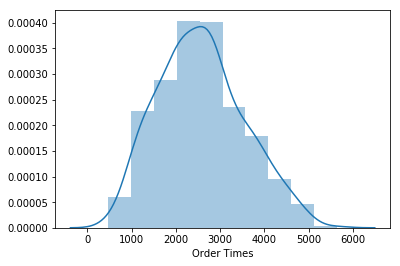

In [29]:
order_number_per_courier=[]
serving_times_per_courier=pd.DataFrame({"Order Times":[]})
for ratio in range(n_of_couriers):
    order_number_per_courier.append(len(courier_objects[ratio].order_serving_time))
    if len(courier_objects[ratio].order_serving_time) != 0:
        serving_times_per_courier=serving_times_per_courier.append(pd.DataFrame({"Order Times":courier_objects[ratio].order_serving_time}),ignore_index = True)
print(order_number_per_courier)
print('Average Order number for couriers is {}'.format(np.mean(order_number_per_courier)))
print('--------------------------------------------------------------------------------')
print(serving_times_per_courier['Order Times'].values)
print('MEAN={}        STD={}'.format(serving_times_per_courier['Order Times'].mean(),serving_times_per_courier['Order Times'].std()))
print('MAX SERVICE TIME ={}'.format(serving_times_per_courier['Order Times'].max()))
sns.distplot(serving_times_per_courier['Order Times'],bins=10)

In [30]:
# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, title = 'Setup')
cust_x=[]
cust_y=[]
courier_x=[]
courier_y=[]
wh_x=[]
wh_y=[]
for i in customer_objects:
    cust_x.append(i.location_x)
    cust_y.append(i.location_y)
for i in courier_objects:
    courier_x.append(i.location_x)
    courier_y.append(i.location_y)
for i in warehouse_objects:
    wh_x.append(i.location_x)
    wh_y.append(i.location_y)

p.asterisk(wh_x, wh_y, color = 'blue',size=45)
p.circle(courier_x, courier_y, color = 'green', alpha = 0.5, size = 15)
#p.circle(cust_x, cust_y, color = 'red', alpha = 0.5, size = 15)
output_notebook()
show(p)

Loading BokehJS ...

## In this simulation warehouses are created in random locations and when an order comes from a customer, the orders are assigned randomly one of the available couriers regardless of the location of that courier.In addition,if a courier is available in a customer location in where that courier visited for an order purpose,the location of that courier remains stable in that location until an order is assigned to that customer.That is to say,that courier does not go to the nearest warehouse to wait the next order.

### In this simulation which lasts 17 hours,the inputs that I gave are;
    TOTAL CUSTOMERS  = 2000
    TOTAL COURİERS   = 15
    TOTAL WAREHOUSES = 4
    

### As a result of simulation, we can see that;
    Average order number for couriers is 39
    Service mean time is 2570.77 and standart deviation of service times is 966.80